In [16]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr 
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [17]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

# Challenge 1: Open And Plot Hillshade

In [18]:
dtm_hill_path = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "pre-flood",
    "lidar",
    "pre_DTM_hill.tif"
)

dtm_hill = rxr.open_rasterio(dtm_hill_path)

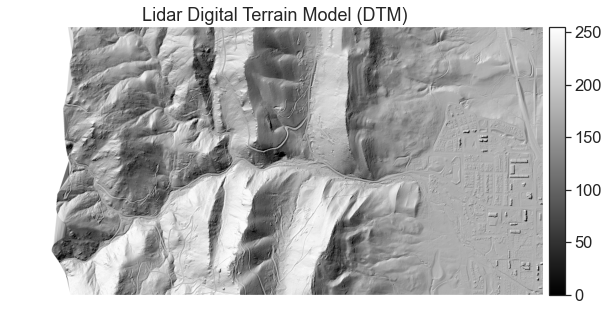

In [19]:
f, ax = plt.subplots(figsize=(10, 5))
ep.plot_bands(
    dtm_hill,
    cmap="gray",
    ax=ax,
)

ax.set_title(
    "Lidar Digital Terrain Model (DTM)"
)
ax.set_axis_off()
plt.show()

# Challenge 2: Overlay DTM Over DTM Hillshade

In [38]:
lidar_dtm_path = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "pre-flood",
    "lidar",
    "pre_DTM.tif"
)

# Open lidar dsm
dtm = rxr.open_rasterio(lidar_dtm_path, masked=True)

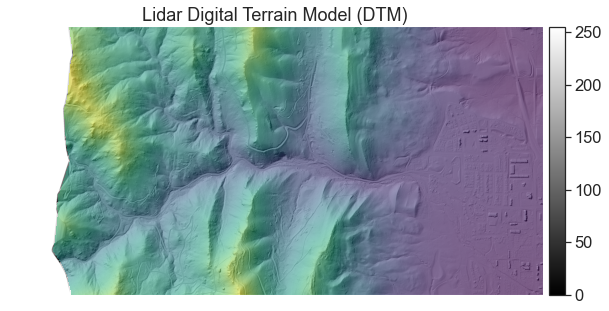

In [41]:
f, ax = plt.subplots(figsize=(10, 5))

ep.plot_bands(
    dtm_hill,
    cmap="gray",
    ax=ax,
)

ep.plot_bands(
    dtm,
    cmap="viridis",
    alpha=.5,
    ax=ax,
    cbar=False
)

ax.set_title(
    "Lidar Digital Terrain Model (DTM)"
)
ax.set_axis_off()
plt.show()


# Challenge 3: Add A Site Boundary to Your Raster Plot

In [50]:
# Open site boundary vector layer
site_bound_path = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "clip-extent.shp",
)
site_bound_shp = gpd.read_file(site_bound_path)

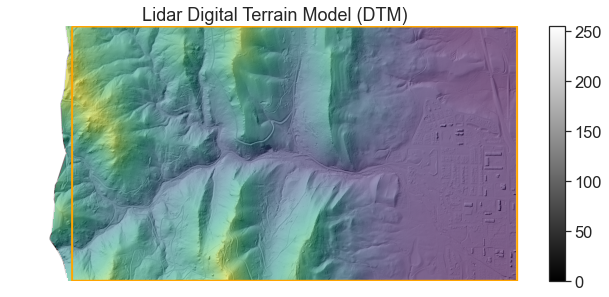

In [57]:
lidar_dem_plot_ext = plotting_extent(dtm[0], dtm.rio.transform())

f, ax = plt.subplots(figsize=(10, 5))

ep.plot_bands(
    dtm_hill,
    cmap="gray",
    ax=ax,
    extent = lidar_dem_plot_ext
)

ep.plot_bands(
    dtm,
    cmap="viridis",
    alpha=.5,
    ax=ax,
    cbar=False,
    extent = lidar_dem_plot_ext
)

site_bound_shp.plot(
    color='None',
    edgecolor='orange',
    linewidth=2,
    ax=ax,
    zorder=4
)

ax.set_title(
    "Lidar Digital Terrain Model (DTM)"
)
ax.set_axis_off()
plt.show()

# Challenge 4 (Optional): Open Post Flood Raster

In [62]:
post_dtm_hill_path = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "post-flood",
    "lidar",
    "post_DTM_hill.tif"
)

# Open lidar dsm
dtm_post_hill = rxr.open_rasterio(post_dtm_hill_path)

In [65]:
post_dtm_path = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "post-flood",
    "lidar",
    "post_DTM.tif"
)

# Open lidar dsm
dtm_post = rxr.open_rasterio(post_dtm_path, masked=True)

lidar_dem_post_plot_ext = plotting_extent(dtm_post[0], dtm.rio.transform())

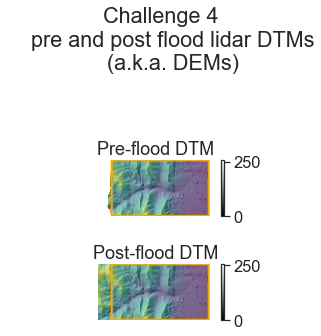

In [66]:
f, ax = plt.subplots(2, 1, figsize=(10, 5))

# plot 1
ep.plot_bands(
    dtm_hill,
    cmap="gray",
    ax=ax[0],
    extent = lidar_dem_plot_ext
)

ep.plot_bands(
    dtm,
    cmap="viridis",
    alpha=.5,
    ax=ax[0],
    cbar=False,
    extent = lidar_dem_plot_ext
)

site_bound_shp.plot(
    color='None',
    edgecolor='orange',
    linewidth=2,
    ax=ax[0],
    zorder=4
)

ax[0].set_title(
    "Pre-flood DTM"
)
ax[0].set_axis_off()

# plot 2
ep.plot_bands(
    dtm_post_hill,
    cmap="gray",
    ax=ax[1],
    extent = lidar_dem_post_plot_ext
)

ep.plot_bands(
    dtm_post,
    cmap="viridis",
    alpha=.5,
    ax=ax[1],
    cbar=False,
    extent = lidar_dem_post_plot_ext
)

site_bound_shp.plot(
    color='None',
    edgecolor='orange',
    linewidth=2,
    ax=ax[1],
    zorder=4
)

ax[1].set_title(
    "Post-flood DTM"
)
ax[1].set_axis_off()

plt.suptitle(
    "Challenge 4\n\
    pre and post flood lidar DTMs\n\
    (a.k.a. DEMs)")
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()